In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
connection = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
# inspector = inspect(engine)
# inspector.get_table_names()
# inspect = inspector.get_columns('measurement')
# for c in inspect:
#     print(c['name'], c["type"])

# Exploratory Climate Analysis

('2017-08-23',)


<function matplotlib.pyplot.show(*args, **kw)>

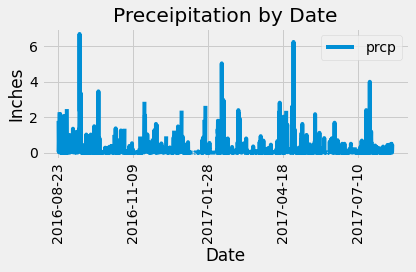

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
lastyear = session.query(measurement.date).order_by(measurement.date.desc()).first()
yearquery = dt.date(2017,8,23) - dt.timedelta(days = 365)
# print((lastyear - dt.timedelta(days=365)
print(lastyear)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp ).filter(measurement.date >= yearquery).all()
# for date in query:
#     print(date)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp = pd.DataFrame(query)
prcp.set_index('date', inplace=True, )
prcp.head()
# Sort the dataframe by date

prcp_sort = prcp.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
prcp_sort.plot(title = "Preceipitation by Date", rot=90)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.tight_layout()
plt.show

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
stats_df = prcp_sort.describe()
stats_df

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to show how many stations are available in this dataset?
session.query(station).group_by(station.station).count()

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_active = session.query(measurement.station).group_by(measurement.station).order_by(func.count(measurement.date).desc()).first()
print(most_active)
# List the stations and the counts in descending order.
stations = session.query(measurement.station, func.count(measurement.date)).\
group_by(measurement.station).order_by(func.count(measurement.date).desc()).all()
stations

('USC00519281',)


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).\
            filter(measurement.station == most_active[0]).all()
temp
#String data together for easy reading

#  f'The lowest temp is: {session.query(func.min(measurement.tobs)},\
#         The highest temp is: {func.max(measurement.tobs)},\
#         The average temp is: {func.avg(measurement.tobs))}.\
#             filter(measurement.station == "USC00519281").all()


[(54.0, 85.0, 71.66378066378067)]

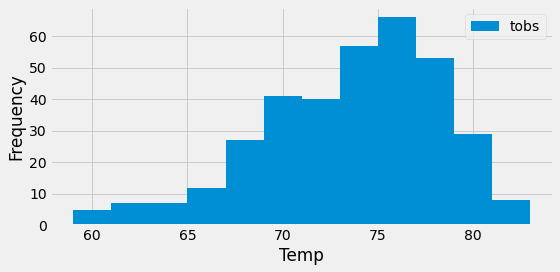

In [26]:
# Choose the station with the highest number of temperature observations.

high_station = session.query(measurement.tobs).filter(measurement.station==most_active[0]).\
    filter(measurement.date >= yearquery).all()
# high_station

#create dataframe to plot as histogram
histogram_df = pd.DataFrame(high_station, columns = ['tobs'])
histogram_df.head()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.figure(figsize = (8,4))
plt.hist(histogram_df['tobs'], bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temp')
plt.legend(['tobs'])
plt.tight_layout()
plt.show()


## Bonus Challenge Assignment

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps('2017-02-28', '2017-03-05')
trip


[(64.0, 72.02777777777777, 78.0)]

In [35]:
# Plot the results from your previous query as a bar chart. 
trip_df = pd.DataFrame(trip, columns=['Tmin', 'Tavg', 'Tmax'])
trip_df
# Use "Trip Avg Temp" as your Title
plt.figure(figsize=(4,8))
ax=trip_df['tavg'].plot.bar(yerr=(trip_df['Tmax']-trip_df['Tmin']), color="blue")
plt.title('Trip Avg Temp')
plt.ylabel 
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


,Tmin,Tavg,Tmax
0,64.0,72.027778,78.0


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
